In [1]:
# Polynomial Regression

In [2]:
# Import relevant libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures,StandardScaler

In [3]:
#setting matplotlib parameters for better visualization of graphs
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'xtick.color':'white',
         'ytick.color':'white'
         }

plt.rcParams.update(params)
%matplotlib inline

In [4]:
# Generate data using numpy
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

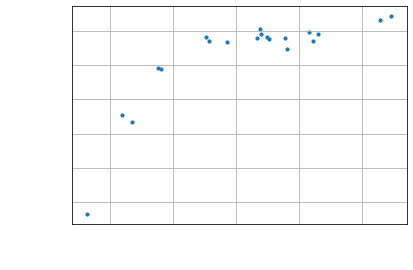

In [5]:
plt.scatter(x,y, s=10)
plt.grid()
plt.xticks(color='white')
plt.yticks(color='white')
plt.xlabel('X',color='white')
plt.ylabel('Y',color='white')
plt.show()

In [6]:
df=pd.DataFrame(list(zip(x,y)),columns=['X','Y'])
print(df)

           X           Y
0  -3.292157  -53.468412
1   0.799528   -1.262560
2  -0.936214   -3.506193
3  -4.722680 -107.223200
4  -3.602674  -49.131950
5   4.931834    8.901224
6  -0.850265   -5.466242
7   2.454072   -5.762632
8   2.309657   -0.600586
9   0.768204    1.222678
10  1.567869   -3.956637
11 -2.362821  -21.989895
12 -0.283113   -6.118123
13  1.634975  -10.468440
14  0.668410   -4.119557
15  0.998977   -3.029419
16 -2.482237  -21.761523
17  2.615475   -1.512952
18  1.060797   -4.754912
19  4.562287    6.507233


In [7]:
# general summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       20 non-null     float64
 1   Y       20 non-null     float64
dtypes: float64(2)
memory usage: 448.0 bytes


In [8]:
# detailed summary of the dataset
df.describe()

,X,Y
count,20.000000,20.000000
mean,0.291996,-14.375105
std,2.616807,27.152598
min,-4.722680,-107.223200
25%,-1.292866,-13.291710
50%,0.783866,-4.437234
75%,1.803645,-1.450354
max,4.931834,8.901224


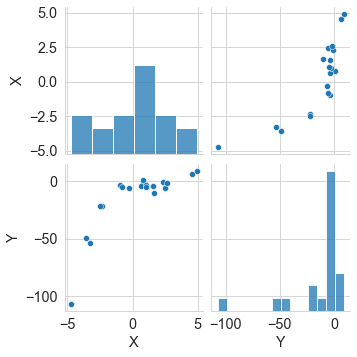

In [9]:
# visualization of data
sns.set_style("whitegrid")
sns.pairplot(df)

In [10]:
# Train test split
X=df.iloc[:,0]
y=df.iloc[:,-1]

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [12]:
# Applying linear regression
lr = LinearRegression()
lr.fit(X_train.to_numpy().reshape(-1, 1),y_train)

LinearRegression()

In [13]:
y_pred = lr.predict(X_test.to_numpy().reshape(-1, 1))

In [14]:
# regression metrics
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2 score",r2_score(y_test,y_pred))

RMSE 8.756326242350804
r2 score 0.8549096697820713


In [15]:
# dataframe to compare the difference between predicted values  and actual values
df_result=pd.DataFrame(list(zip(y_pred,y_test)),columns=['predicted_values','actual_values'])
print(df_result)

   predicted_values  actual_values
0        -19.040766      -6.118123
1        -45.341241     -49.131950
2         -8.393131      -4.754912
3        -42.881053     -53.468412


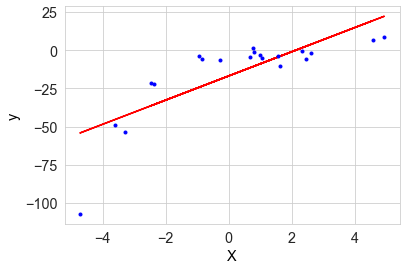

In [17]:
# Visualization of result
plt.plot(X_train,lr.predict(X_train.to_numpy().reshape(-1, 1)) ,color='r')
plt.plot(X, y, "b.")
plt.xlabel("X",color='black')
plt.ylabel("y",color='black')
plt.show()

In [18]:
# Train test split
X=df.iloc[:,0]
y=df.iloc[:,-1]

In [19]:
# Applying Polynomial Regression
poly = PolynomialFeatures(degree=3,include_bias=True)

In [20]:
# scaling the data b/w -1 and 1 using StandardScaler
std_scaler = StandardScaler()
X=std_scaler.fit_transform(X.to_numpy().reshape(-1, 1))


In [21]:
y=std_scaler.fit_transform(y.to_numpy().reshape(-1, 1))


In [23]:
# Train-test-split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [24]:
# fitting the data
X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [25]:
print(X_train[0])
print(X_train_trans[0])

[0.18670819]
[1.         0.18670819 0.03485995 0.00650864]


In [26]:
# Linear Regression model
lr = LinearRegression()
lr.fit(X_train_trans,y_train)

LinearRegression()

In [27]:
y_pred = lr.predict(X_test_trans)

In [28]:
# regression metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2 score",r2_score(y_test,y_pred))

RMSE 0.22066669807431186
r2 score 0.9354621349583383


In [30]:
# dataframe to compare the difference between predicted values  and actual values
df_result=pd.DataFrame(list(zip(y_pred,y_test)),columns=['predicted_values','actual_values'])
print(df_result)

        predicted_values          actual_values
0   [0.4791201012592823]   [0.3119953651117374]
1   [-1.564332629492971]  [-1.3133096973361291]
2   [0.4547761221243376]  [0.36350517435453406]
3  [-1.1681323674900637]  [-1.4771656840568619]


C:\Users\muska\AppData\Local\Temp\ipykernel_20384\3897669206.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b." (-> color='b'). The keyword argument will take precedence.
  plt.plot(X_train, y_train, "b.",label='Training points',color='green')
C:\Users\muska\AppData\Local\Temp\ipykernel_20384\3897669206.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b." (-> color='b'). The keyword argument will take precedence.
  plt.plot(X_test, y_test, "b.",label='Test points',color='red')


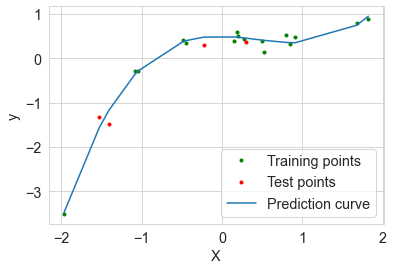

In [31]:
plt.plot(X_train, y_train, "b.",label='Training points',color='green')
plt.plot(X_test, y_test, "b.",label='Test points',color='red')
sorted_zip = sorted(zip(X,lr.predict(poly.fit_transform(X))))
x_poly, poly_pred = zip(*sorted_zip)
plt.plot(x_poly,poly_pred,label='Prediction curve')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()